## AIDA PROJECT **1**


Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

Loading the data

In [2]:
# Loading the data set into a pandas dataframe
data = pd.read_csv("fashionbrands_Ashoka.csv")
data.head()

,brand,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic
0,Chanel,449,252,106,236,61,13,8,29,16
1,Louis Vuitton,410,286,83,142,80,18,20,48,31
2,Christian Dior,356,200,95,206,67,19,18,27,9
3,Tiffany,362,219,103,187,59,55,36,35,10
4,Rolex,442,248,114,89,109,4,9,52,12


In [3]:
# Printing the various attributes of the brands
attributes = data.columns
print(attributes)

Index(['brand', 'luxurious', 'traditional', 'intellectual', 'brilliant',
       'calm', 'youthful', 'friendly', 'simple', 'energetic'],
      dtype='object')


In [4]:
data1 = data.iloc[:,1:] # This removes the text portion of the data set
print(data1)

    luxurious  traditional  intellectual  brilliant  calm  youthful  friendly  \
0         449          252           106        236    61        13         8   
1         410          286            83        142    80        18        20   
2         356          200            95        206    67        19        18   
3         362          219           103        187    59        55        36   
4         442          248           114         89   109         4         9   
5         287          287           143         42   199        29        67   
6         198          191           101         39   147        61        70   
7          86           62            31         88    35       216        97   
8           6            7            10          8    23       260       331   
9           8            5            10          2    10       272       132   
10         10           10            10          9    24       275       203   

    simple  energetic  
0  

Scatter Plot

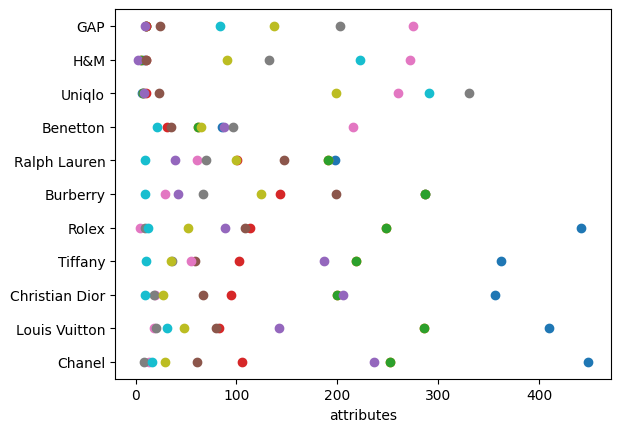

In [5]:
# Making a scatter plot
plt.scatter(data['luxurious'],data['brand'])
plt.scatter(data['traditional'],data['brand'])
plt.scatter(data['traditional'],data['brand'])
plt.scatter(data['intellectual'],data['brand'])
plt.scatter(data['brilliant'],data['brand'])
plt.scatter(data['calm'],data['brand'])
plt.scatter(data['youthful'],data['brand'])
plt.scatter(data['friendly'],data['brand'])
plt.scatter(data['simple'],data['brand'])
plt.scatter(data['energetic'],data['brand'], )
plt.xlabel("attributes")
plt.show()

Creating a Heatmap

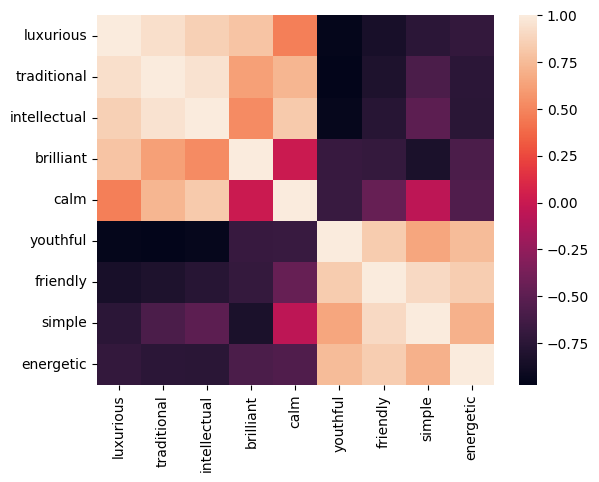

In [6]:
# Finding correlation between the different elements of a brand
plt.figsize=(15,15)
sns.heatmap(data.corr())
plt.show()

K-Means Clustering

In [7]:
# K-Means clustering
data_x = data.iloc[:,1:]
# Standardize the data
min_max_scaler = MinMaxScaler()
data_z = min_max_scaler.fit_transform(data_x)

# Defining number of clusters
cluster = KMeans (n_clusters = 3, random_state = 1)
cluster.fit(data_z)

# Getting the centroids
centroids = cluster.cluster_centers_

# Putting the centroid values into a dataframe under repective columns
centroid_df = pd.DataFrame(centroids, columns = list(data_z))

# Predciting which cluster each brand will go
prediction= cluster.predict(data_z) 

# Adding a column called Group 
data["Group"] = pd.DataFrame(prediction, columns= ["Group"])
data.to_csv('results.csv')

# printing the data to see which cluster each brand belongs to
data

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,brand,luxurious,traditional,intellectual,brilliant,calm,youthful,friendly,simple,energetic,Group
0,Chanel,449,252,106,236,61,13,8,29,16,2
1,Louis Vuitton,410,286,83,142,80,18,20,48,31,2
2,Christian Dior,356,200,95,206,67,19,18,27,9,2
3,Tiffany,362,219,103,187,59,55,36,35,10,2
4,Rolex,442,248,114,89,109,4,9,52,12,2
5,Burberry,287,287,143,42,199,29,67,124,9,0
6,Ralph Lauren,198,191,101,39,147,61,70,100,9,0
7,Benetton,86,62,31,88,35,216,97,65,21,1
8,Uniqlo,6,7,10,8,23,260,331,199,291,1
9,H&M,8,5,10,2,10,272,132,91,223,1


/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


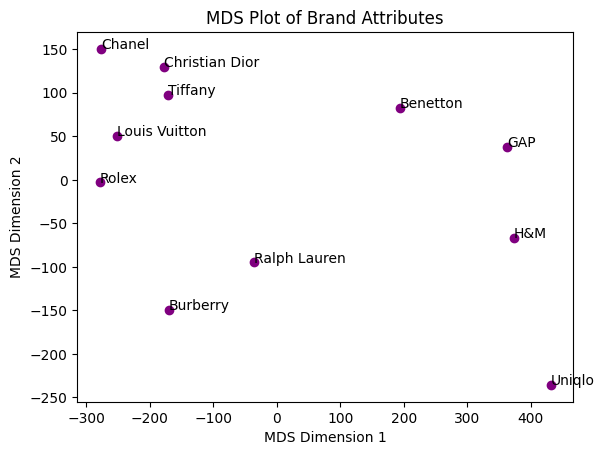

In [8]:
# Performing Multi Dimensional Scaling

# Read data again, mentioning the index column
data2 = pd.read_csv("fashionbrands_Ashoka.csv", index_col = 0)

# Initialize MDS with the number of components set to 2
mds = MDS(n_components=2, dissimilarity='euclidean')

# Fit the data and transform it into two dimensions
mdsresults = mds.fit_transform(data2)

# Create a scatter plot of the MDS results
plt.scatter(mdsresults[:, 0], mdsresults[:, 1], color='purple')

for i, brand in enumerate(data2.index):
    plt.annotate(brand, (mdsresults[i, 0], mdsresults[i, 1]))

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Plot of Brand Attributes')
plt.show()


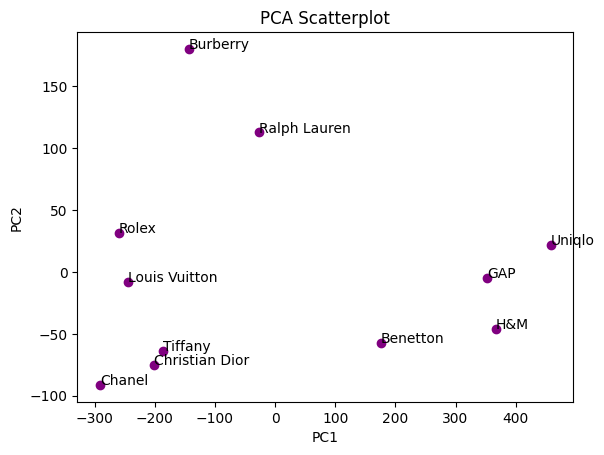

In [9]:
# Conducting Principal Component Analysis

# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data1)

# create a PCA object with 2 principal components
pca = PCA(n_components=2)

# fit the PCA model to the data
pca.fit(data1)

# transform the data onto the first two principal components
data_pca = pca.transform(data1)

# create a scatterplot of the first two principal components
plt.scatter(data_pca[:,0], data_pca[:,1], color='purple')

# label each point with its brand name
for i, brand in enumerate(data['brand']):
    plt.annotate(brand, (data_pca[i,0], data_pca[i,1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot')

plt.show()